# Proyek Akhir Sistem Rekomendasi Film: MovieLens 100K
---
* **Nama:** Wildan Mufid Ramadhan
* **Email:** wildan.20nov@gmail.com
* **Dicoding ID:** wildan.20nov@gmail.com

## Project Overview
Proyek ini bertujuan untuk membangun sistem rekomendasi film menggunakan dataset MovieLens. Sistem rekomendasi sangat penting dalam industri hiburan modern karena membantu pengguna menemukan konten baru yang relevan, meningkatkan kepuasan pengguna, dan mendorong interaksi dengan platform. Dengan semakin banyaknya pilihan film yang tersedia, sistem rekomendasi menjadi krusial untuk mengatasi masalah kelebihan informasi dan menyajikan pengalaman yang dipersonalisasi kepada setiap pengguna.

## Business Understanding
### Problem Statements
Pengguna seringkali kesulitan menemukan film yang sesuai dengan preferensi mereka di antara ribuan film yang tersedia. Hal ini dapat menyebabkan pengalaman pengguna yang kurang memuaskan dan potensi kehilangan minat terhadap platform.

### Goals
Tujuan dari proyek ini adalah untuk mengembangkan sistem rekomendasi film yang mampu menyarankan film-film yang relevan kepada pengguna berdasarkan riwayat tontonan dan preferensi mereka, sehingga meningkatkan pengalaman pengguna dan retensi.

### Solution Approach
Dalam proyek ini, kami akan mengimplementasikan dua pendekatan sistem rekomendasi yang berbeda: Collaborative Filtering dan Content-Based Filtering. 
* Collaborative Filtering akan menggunakan algoritma LightFM, yang bekerja dengan menganalisis interaksi pengguna-item untuk menemukan pola dan kesamaan. 
* Content-Based Filtering akan merekomendasikan item berdasarkan atribut item itu sendiri, seperti genre film, dengan menghitung kesamaan antar item.


## Download and Load Dataset

In [2]:
!curl -L -o ./ml-latest-small.zip https://files.grouplens.org/datasets/movielens/ml-latest-small.zip
!mkdir ./data
!unzip ml-latest-small.zip -d ./data
!rm  ml-latest-small.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  955k  100  955k    0     0   415k      0  0:00:02  0:00:02 --:--:--  415k
Archive:  ml-latest-small.zip
   creating: ./data/ml-latest-small/
  inflating: ./data/ml-latest-small/links.csv  
  inflating: ./data/ml-latest-small/tags.csv  
  inflating: ./data/ml-latest-small/ratings.csv  
  inflating: ./data/ml-latest-small/README.txt  
  inflating: ./data/ml-latest-small/movies.csv  


In [1]:
import pandas as pd

df_movies_raw = pd.read_csv("./data/ml-latest-small/movies.csv")
df_movies_raw.head(3)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance


In [2]:
df_ratings_raw = pd.read_csv("./data/ml-latest-small/ratings.csv")
df_ratings_raw.head(3)

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224


In [3]:
df_tags_raw = pd.read_csv("./data/ml-latest-small/tags.csv")
df_tags_raw.head(3)

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992


In [4]:
df_links_raw = pd.read_csv("./data/ml-latest-small/links.csv")
df_links_raw.head(3)

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0


## Data Understanding
Dataset yang digunakan adalah MovieLens ml-latest-small, yang berisi 100.836 rating dan 3.683 aplikasi tag dari 610 pengguna untuk 9.742 film. Data ini dikumpulkan antara 29 Maret 1996 dan 24 September 2018. Dataset ini terdiri dari empat file CSV:

- `movies.csv`: Berisi `movieId`, `title`, dan `genres` film.
- `ratings.csv`: Berisi `userId`, `movieId`, `rating`, dan `timestamp` dari setiap rating yang diberikan pengguna.
- `tags.csv`: Berisi `userId`, `movieId`, `tag`, dan `timestamp` dari setiap tag yang diterapkan pengguna.
- `links.csv`: Berisi `movieId`, `imdbId`, dan `tmdbId` untuk menghubungkan film dengan database eksternal.

**Tautan Sumber Data:** <br>
[https://grouplens.org/datasets/movielens/latest/](https://grouplens.org/datasets/movielens/latest/)

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
print('Movies DataFrame Info:')
df_movies_raw.info()

print('\nRatings DataFrame Info:')
df_ratings_raw.info()

Movies DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB

Ratings DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [7]:
# Check for missing values
print('Missing values in Movies DataFrame:')
print(df_movies_raw.isnull().sum())

print('\nMissing values in Ratings DataFrame:')
print(df_ratings_raw.isnull().sum())

Missing values in Movies DataFrame:
movieId    0
title      0
genres     0
dtype: int64

Missing values in Ratings DataFrame:
userId       0
movieId      0
rating       0
timestamp    0
dtype: int64


**Informasi Data:**
- `movies.csv`: Tidak ada nilai yang hilang. Berisi 9742 entri film.
- `ratings.csv`: Tidak ada nilai yang hilang. Berisi 100836 entri rating.

In [8]:
print('Ratings Distribution:')
print(df_ratings_raw['rating'].describe())

Ratings Distribution:
count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: rating, dtype: float64


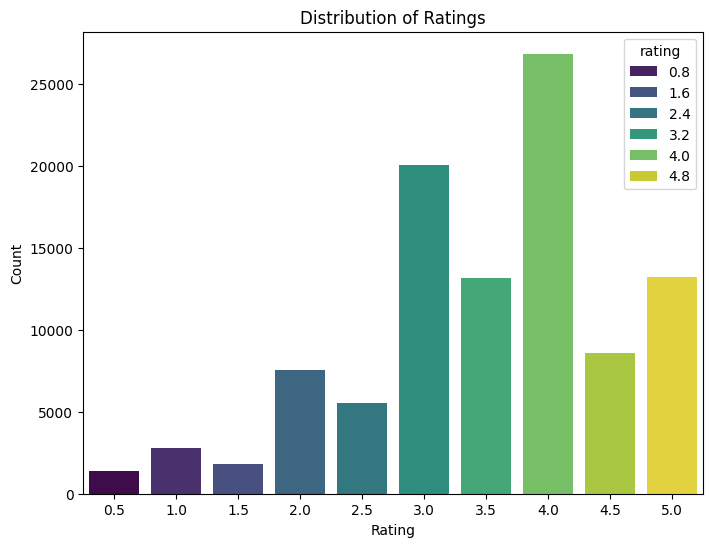

In [9]:
plt.figure(figsize=(8, 6))
sns.countplot(x='rating', data=df_ratings_raw, hue='rating', palette='viridis')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.savefig('assets/rating_distribution.png')
plt.show()

**Distribusi Rating:**<br>
Rating diberikan pada skala 0.5 hingga 5.0. Distribusi rating menunjukkan bahwa sebagian besar rating berada di angka 3.0, 3.5, 4.0, dan 5.0, menunjukkan kecenderungan pengguna untuk memberikan rating yang cukup tinggi.

In [10]:
# Number of unique movies and users
print(f'Number of unique movies: {df_movies_raw["movieId"].nunique()}')
print(f'Number of unique users: {df_ratings_raw["userId"].nunique()}')

Number of unique movies: 9742
Number of unique users: 610


In [11]:
# Top 10 movies with most ratings
most_rated_movies = df_ratings_raw['movieId'].value_counts().head(10).index

print('Top 10 movies with most ratings:')
df_movies_raw[df_movies_raw['movieId'].isin(most_rated_movies)]

Top 10 movies with most ratings:


,movieId,title,genres
97,110,Braveheart (1995),Action|Drama|War
224,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi
257,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
277,318,"Shawshank Redemption, The (1994)",Crime|Drama
314,356,Forrest Gump (1994),Comedy|Drama|Romance|War
418,480,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller
461,527,Schindler's List (1993),Drama|War
507,589,Terminator 2: Judgment Day (1991),Action|Sci-Fi
510,593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller
1939,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller


In [12]:
df_merged_raw = pd.merge(df_ratings_raw, df_movies_raw, on='movieId')

average_ratings = df_merged_raw.groupby('title')['rating'].mean().sort_values(ascending=False)
print('Top 10 movies by average rating:')
print(average_ratings.head(10))

Top 10 movies by average rating:
title
Gena the Crocodile (1969)                    5.0
True Stories (1986)                          5.0
Cosmic Scrat-tastrophe (2015)                5.0
Love and Pigeons (1985)                      5.0
Red Sorghum (Hong gao liang) (1987)          5.0
Thin Line Between Love and Hate, A (1996)    5.0
Lesson Faust (1994)                          5.0
Eva (2011)                                   5.0
Who Killed Chea Vichea? (2010)               5.0
Siam Sunset (1999)                           5.0
Name: rating, dtype: float64


In [13]:
ratings_count = df_merged_raw.groupby('title')['rating'].count().sort_values(ascending=False)
print('Top 10 movies by number of ratings:')
print(ratings_count.head(10))

Top 10 movies by number of ratings:
title
Forrest Gump (1994)                          329
Shawshank Redemption, The (1994)             317
Pulp Fiction (1994)                          307
Silence of the Lambs, The (1991)             279
Matrix, The (1999)                           278
Star Wars: Episode IV - A New Hope (1977)    251
Jurassic Park (1993)                         238
Braveheart (1995)                            237
Terminator 2: Judgment Day (1991)            224
Schindler's List (1993)                      220
Name: rating, dtype: int64


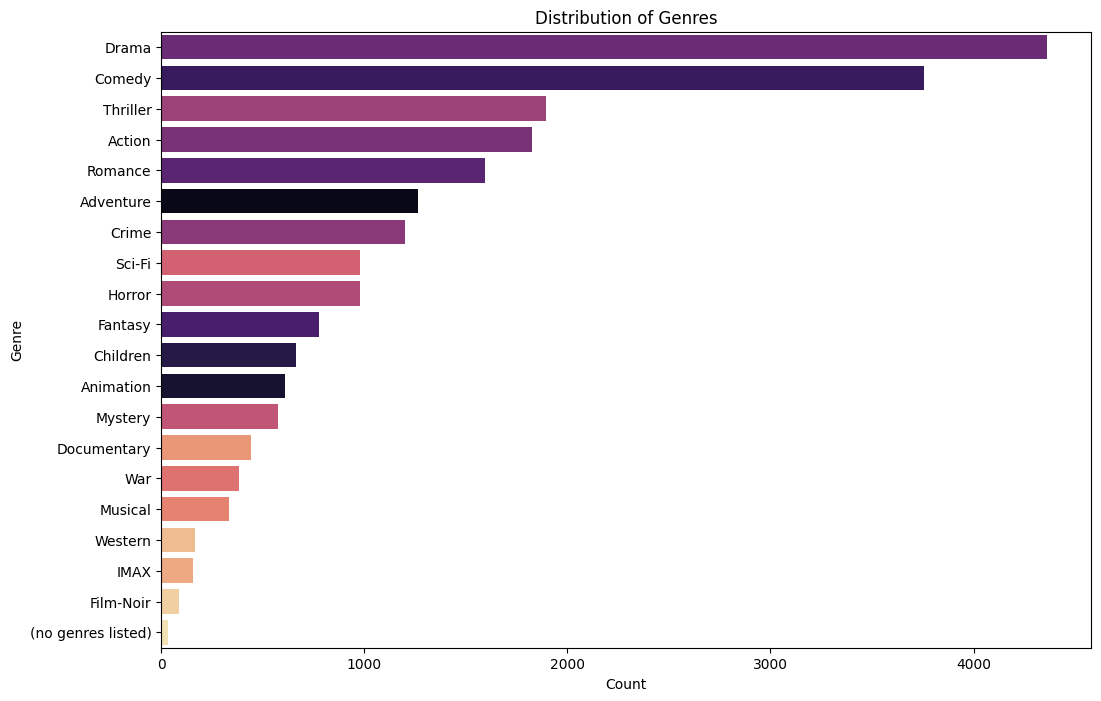

In [14]:
df_movies_raw['genres'] = df_movies_raw['genres'].apply(lambda x: x.split('|'))
df_genres_raw = df_movies_raw.explode('genres')

plt.figure(figsize=(12, 8))
sns.countplot(y='genres', data=df_genres_raw, order=df_genres_raw['genres'].value_counts().index, palette='magma', hue='genres')
plt.title('Distribution of Genres')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.savefig('assets/genre_distribution.png')
plt.show()

**Distribusi Genre:**<br>
Genre film paling populer dalam dataset adalah Drama, Comedy, dan Thriller.

## Data Preparation
Tahapan persiapan data meliputi:

In [16]:
df_movies_prep = df_movies_raw.copy()
df_ratings_prep = df_ratings_raw.copy()

### Pemetaan ID
Untuk Collaborative Filtering, `userId` dan `movieId` dipetakan ke ID internal yang berurutan mulai dari 0 untuk digunakan oleh LightFM.

In [17]:
user_to_id = {user: i for i, user in enumerate(df_ratings_prep["userId"].unique())}
movie_to_id = {movie: i for i, movie in enumerate(df_ratings_prep["movieId"].unique())}

df_ratings_prep["user_id_mapped"] = df_ratings_prep["userId"].map(user_to_id)
df_ratings_prep["movie_id_mapped"] = df_ratings_prep["movieId"].map(movie_to_id)

num_users = len(user_to_id)
num_movies = len(movie_to_id)

In [18]:
df_ratings_prep.head(3)

,userId,movieId,rating,timestamp,user_id_mapped,movie_id_mapped
0,1,1,4.0,964982703,0,0
1,1,3,4.0,964981247,0,1
2,1,6,4.0,964982224,0,2


### Pembuatan Matriks Interaksi
Matriks interaksi `user-item` dibuat menggunakan `csr_matrix` dari `scipy.sparse`. Matriks ini merepresentasikan apakah seorang pengguna telah berinteraksi (memberi rating) pada suatu film. Meskipun rating eksplisit tersedia, kami menggunakan pendekatan implisit (interaksi biner) untuk model LightFM dengan `loss=\'warp\'`.

In [19]:
from scipy.sparse import csr_matrix

In [20]:
interactions = csr_matrix((
    df_ratings_prep["rating"].values,
    (df_ratings_prep["user_id_mapped"].values, df_ratings_prep["movie_id_mapped"].values)
), shape=(num_users, num_movies))

### Pembagian Data
Data rating dibagi menjadi set pelatihan (80%) dan set pengujian (20%) untuk evaluasi model yang tepat.

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
train_ratings_cf, test_ratings_cf = train_test_split(df_ratings_prep, test_size=0.2, random_state=42)

train_interactions_cf = csr_matrix((
    train_ratings_cf["rating"].values,
    (train_ratings_cf["user_id_mapped"].values, train_ratings_cf["movie_id_mapped"].values)
), shape=(num_users, num_movies))

test_interactions_cf = csr_matrix((
    test_ratings_cf["rating"].values,
    (test_ratings_cf["user_id_mapped"].values, test_ratings_cf["movie_id_mapped"].values)
), shape=(num_users, num_movies))

In [33]:
print(f"Train size: {train_interactions_cf.shape}")
print(f"Test size: {test_interactions_cf.shape}")

Train size: (610, 9724)
Test size: (610, 9724)


### Ekstraksi Fitur Konten
Untuk Content-Based Filtering, genre film diubah menjadi representasi numerik menggunakan TF-IDF Vectorizer. Kemudian, kesamaan kosinus dihitung antar film berdasarkan vektor genre mereka.

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [45]:
df_movies_prep["genres"] = df_movies_prep["genres"].fillna("")
df_movies_prep["genres"] = df_movies_prep["genres"].apply(lambda lst: "|".join(lst))

tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(df_movies_prep["genres"])

In [49]:
print(f"TF-IDF size: {tfidf_matrix.shape}")

TF-IDF size: (9742, 24)


## Modeling and Result

### Collaborative Filtering (LightFM)
Menggunakan model LightFM dengan fungsi kerugian `WARP` (Weighted Approximate-Rank Pairwise). Model ini dilatih pada matriks interaksi pelatihan selama 30 epoch.

In [50]:
from lightfm import LightFM
from lightfm.evaluation import precision_at_k, recall_at_k

In [51]:
model_cf = LightFM(loss="warp")
model_cf.fit(train_interactions_cf, epochs=30, num_threads=2)

In [52]:
train_precision_cf = precision_at_k(model_cf, train_interactions_cf, k=10).mean()
test_precision_cf = precision_at_k(model_cf, test_interactions_cf, k=10).mean()
train_recall_cf = recall_at_k(model_cf, train_interactions_cf, k=10).mean()
test_recall_cf = recall_at_k(model_cf, test_interactions_cf, k=10).mean()

In [59]:
print("Collaborative Filtering (LightFM) Results")
print("="*45)
print(f"Train Precision@k : {train_precision_cf:.4f}")
print(f"Test Precision@k  : {test_precision_cf:.4f}")
print(f"Train Recall@k    : {train_recall_cf:.4f}")
print(f"Test Recall@k     : {test_recall_cf:.4f}")

Collaborative Filtering (LightFM) Results
Train Precision@k : 0.4628
Test Precision@k  : 0.0952
Train Recall@k    : 0.0718
Test Recall@k     : 0.0628


Hasil evaluasi menunjukkan bahwa model LightFM memiliki presisi yang lebih tinggi pada data pelatihan dibandingkan data pengujian, yang wajar. Recall pada data pengujian menunjukkan kemampuan model untuk merekomendasikan item yang relevan.

### Content-Based Filtering

In [70]:
from sklearn.metrics.pairwise import cosine_similarity

In [71]:
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

## Inference

In [65]:
import numpy as np

### Collaborative Filtering (LightFM)

In [89]:
def get_recommendations_cf(model, user_id, movies_df, user_to_id, movie_to_id, num_recommendations=10):
    user_internal_id = user_to_id.get(user_id)
    if user_internal_id is None:
        return [], "User not found."

    known_positives = df_ratings_prep[df_ratings_prep["userId"] == user_id]["movieId"].tolist()
    known_positive_titles = movies_df[movies_df["movieId"].isin(known_positives)]["title"].tolist()

    scores = model.predict(user_internal_id, np.arange(num_movies))
    top_movie_ids_mapped = scores.argsort()[::-1]

    id_to_movie = {v: k for k, v in movie_to_id.items()}
    top_movie_ids = [id_to_movie[m_id_mapped] for m_id_mapped in top_movie_ids_mapped]

    recommended_movie_ids = [m_id for m_id in top_movie_ids if m_id not in known_positives]
    recommended_movies = movies_df[movies_df["movieId"].isin(recommended_movie_ids)]["title"].head(num_recommendations).tolist()

    return known_positive_titles, recommended_movies

In [90]:
user_id_to_recommend = 1
known_movies_cf, recommendations_cf = get_recommendations_cf(model_cf, user_id_to_recommend, df_movies_prep, user_to_id, movie_to_id)

print(f"Collaborative Filtering (LightFM) Recommendations for User {user_id_to_recommend}")
print("="*65)
print(f"Movies known by user {user_id_to_recommend}:")
for movie in known_movies_cf:
    print(f"- {movie}")
print("="*65)
print(f"Top 10 recommendations for user {user_id_to_recommend}:")
for movie in recommendations_cf:
    print(f"- {movie}")

Collaborative Filtering (LightFM) Recommendations for User 1
Movies known by user 1:
- Toy Story (1995)
- Grumpier Old Men (1995)
- Heat (1995)
- Seven (a.k.a. Se7en) (1995)
- Usual Suspects, The (1995)
- From Dusk Till Dawn (1996)
- Bottle Rocket (1996)
- Braveheart (1995)
- Rob Roy (1995)
- Canadian Bacon (1995)
- Desperado (1995)
- Billy Madison (1995)
- Clerks (1994)
- Dumb & Dumber (Dumb and Dumber) (1994)
- Ed Wood (1994)
- Star Wars: Episode IV - A New Hope (1977)
- Pulp Fiction (1994)
- Stargate (1994)
- Tommy Boy (1995)
- Clear and Present Danger (1994)
- Forrest Gump (1994)
- Jungle Book, The (1994)
- Mask, The (1994)
- Blown Away (1994)
- Dazed and Confused (1993)
- Fugitive, The (1993)
- Jurassic Park (1993)
- Mrs. Doubtfire (1993)
- Schindler's List (1993)
- So I Married an Axe Murderer (1993)
- Three Musketeers, The (1993)
- Tombstone (1993)
- Dances with Wolves (1990)
- Batman (1989)
- Silence of the Lambs, The (1991)
- Pinocchio (1940)
- Fargo (1996)
- Mission: Impossib

### Content-Based Filtering

Untuk Content-Based Filtering, menggunakan kesamaan kosinus berdasarkan fitur genre film. Model ini merekomendasikan film yang memiliki genre serupa dengan film yang disukai pengguna.

In [91]:
def get_recommendations_cb(movie_title, movies_df, cosine_sim, num_recommendations=10):
    idx = movies_df[movies_df["title"] == movie_title].index[0]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:num_recommendations+1]
    movie_indices = [i[0] for i in sim_scores]

    return movies_df["title"].iloc[movie_indices].tolist()

In [92]:
if known_movies_cf:
    example_movie_for_cb = known_movies_cf[0] # Take the first movie the user rated
    recommendations_cb = get_recommendations_cb(example_movie_for_cb, df_movies_prep, cosine_sim)
    print(f"Content-Based Filtering Recommendations for Movie: {example_movie_for_cb}")
    print("="*70)
    print(f"Top 10 similar movies to '{example_movie_for_cb}':")
    for movie in recommendations_cb:
        print(f"- {movie}")
else:
    print("User has not rated any movies, cannot provide content-based recommendations based on known movies.")

Content-Based Filtering Recommendations for Movie: Toy Story (1995)
Top 10 similar movies to 'Toy Story (1995)':
- Antz (1998)
- Toy Story 2 (1999)
- Adventures of Rocky and Bullwinkle, The (2000)
- Emperor's New Groove, The (2000)
- Monsters, Inc. (2001)
- Wild, The (2006)
- Shrek the Third (2007)
- Tale of Despereaux, The (2008)
- Asterix and the Vikings (Astérix et les Vikings) (2006)
- Turbo (2013)


## Evaluation

Metrik evaluasi yang digunakan untuk Collaborative Filtering (LightFM) adalah Precision@k dan Recall@k. Precision@k mengukur proporsi item yang direkomendasikan yang relevan di antara k item teratas, sedangkan Recall@k mengukur proporsi item relevan yang berhasil direkomendasikan di antara semua item relevan. Metrik ini dipilih karena relevan untuk sistem rekomendasi, di mana tujuan utamanya adalah menyajikan daftar item yang paling mungkin disukai pengguna.

Untuk Content-Based Filtering, evaluasi dilakukan secara kualitatif dengan memeriksa relevansi rekomendasi berdasarkan genre. Karena sifatnya yang berbasis konten, metrik kuantitatif seperti Precision/Recall kurang relevan tanpa adanya data eksplisit tentang preferensi genre pengguna.

**Perbandingan Algoritma:**
- **Collaborative Filtering (LightFM):**<br>
Mampu menemukan rekomendasi yang tidak terduga (serendipitous) karena tidak hanya bergantung pada atribut item, tetapi juga pada perilaku pengguna lain. Namun, mungkin mengalami masalah cold-start untuk pengguna atau item baru yang belum memiliki interaksi yang cukup.
- **Content-Based Filtering:**<br>
Sangat baik dalam merekomendasikan item yang serupa dengan yang sudah disukai pengguna. Tidak mengalami masalah cold-start untuk item baru jika atribut kontennya tersedia. Namun, mungkin kurang mampu memberikan rekomendasi yang beragam atau tidak terduga karena terbatas pada atribut konten yang ada.

Kedua algoritma memiliki kelebihan dan kekurangannya masing-masing, dan pilihan terbaik seringkali tergantung pada kasus penggunaan spesifik dan ketersediaan data.